<a href="https://colab.research.google.com/github/su-per-man/NASA-Space-Apps-Challenge-2023/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mg1_data = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/NASA Space Apps Challenge/Data/mg1_raw/oe_mg1_dscovr_s20230909000000_e20230909235959_p20230912010102_pub.nc')
fc1_data = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/NASA Space Apps Challenge/Data/fc1_raw/oe_fc1_dscovr_s20230909000000_e20230909235959_p20230912014853_pub.nc')

In [ ]:
print(mg1_data)
print(fc1_data)

<xarray.Dataset>
Dimensions:                   (time: 4199561)
Coordinates:
  * time                      (time) datetime64[ns] 2023-09-09T00:00:00.00199...
Data variables: (12/21)
    measurement_mode          (time) int8 ...
    measurement_range         (time) int8 ...
    bt                        (time) float32 ...
    bx_gse                    (time) float32 ...
    by_gse                    (time) float32 ...
    bz_gse                    (time) float32 ...
    ...                        ...
    old_packet_time_flag      (time) int8 ...
    fill_flag                 (time) int8 ...
    possible_saturation_flag  (time) int8 ...
    calibration_mode_flag     (time) int8 ...
    maneuver_flag             (time) int8 ...
    low_sample_count_flag     (time) int8 ...
Attributes: (12/40)
    Conventions:                    ACDD-1.3, Spase v2.2.3
    title:                          DSCOVR Magnetometer Level 1
    id:                             oe_mg1_dscovr_s20230909000000_e2023090923

In [ ]:
for var_name, data_array in fc1_data.data_vars.items():
    print(f"Faraday Cup Variable Name: {var_name}")

Faraday Cup Variable Name: proton_vx_gse
Faraday Cup Variable Name: proton_vy_gse
Faraday Cup Variable Name: proton_vz_gse
Faraday Cup Variable Name: proton_vx_gsm
Faraday Cup Variable Name: proton_vy_gsm
Faraday Cup Variable Name: proton_vz_gsm
Faraday Cup Variable Name: proton_speed
Faraday Cup Variable Name: proton_density
Faraday Cup Variable Name: proton_temperature
Faraday Cup Variable Name: alpha_vx_gse
Faraday Cup Variable Name: alpha_vy_gse
Faraday Cup Variable Name: alpha_vz_gse
Faraday Cup Variable Name: alpha_vx_gsm
Faraday Cup Variable Name: alpha_vy_gsm
Faraday Cup Variable Name: alpha_vz_gsm
Faraday Cup Variable Name: alpha_speed
Faraday Cup Variable Name: alpha_density
Faraday Cup Variable Name: alpha_temperature
Faraday Cup Variable Name: backfill_flag
Faraday Cup Variable Name: future_packet_time_flag
Faraday Cup Variable Name: old_packet_time_flag
Faraday Cup Variable Name: fill_flag
Faraday Cup Variable Name: normal_mode_flag
Faraday Cup Variable Name: proton_peak_u

In [ ]:
for var_name, data_array in mg1_data.data_vars.items():
    print(f"Magnetometer Variable Name: {var_name}")

Magnetometer Variable Name: measurement_mode
Magnetometer Variable Name: measurement_range
Magnetometer Variable Name: bt
Magnetometer Variable Name: bx_gse
Magnetometer Variable Name: by_gse
Magnetometer Variable Name: bz_gse
Magnetometer Variable Name: theta_gse
Magnetometer Variable Name: phi_gse
Magnetometer Variable Name: bx_gsm
Magnetometer Variable Name: by_gsm
Magnetometer Variable Name: bz_gsm
Magnetometer Variable Name: theta_gsm
Magnetometer Variable Name: phi_gsm
Magnetometer Variable Name: backfill_flag
Magnetometer Variable Name: future_packet_time_flag
Magnetometer Variable Name: old_packet_time_flag
Magnetometer Variable Name: fill_flag
Magnetometer Variable Name: possible_saturation_flag
Magnetometer Variable Name: calibration_mode_flag
Magnetometer Variable Name: maneuver_flag
Magnetometer Variable Name: low_sample_count_flag


<ipython-input-10-8a20208b5ce1>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


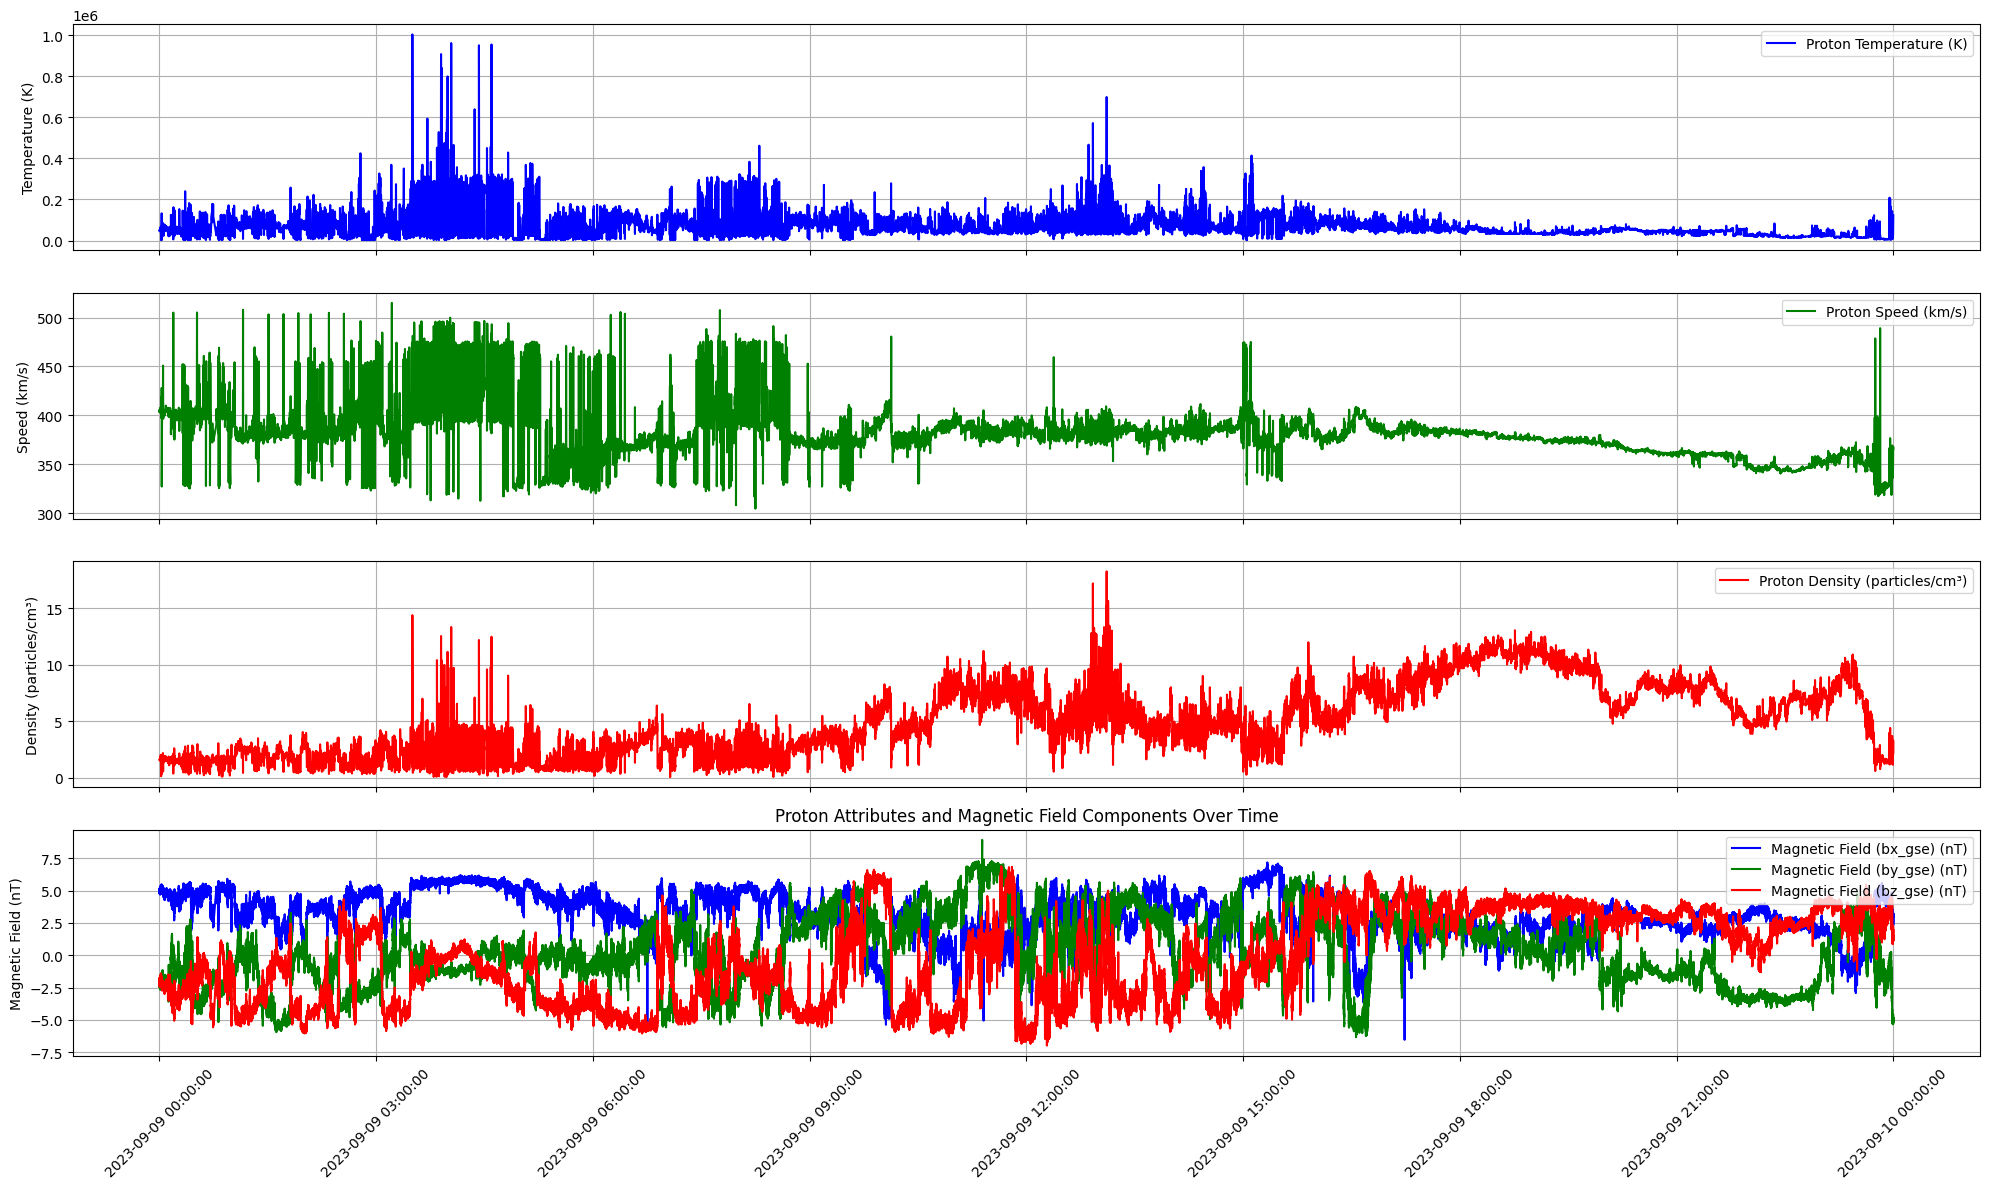

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

time_mg1 = mg1_data['time']
time_fc1 = fc1_data['time']

bx_gse = mg1_data['bx_gse']
by_gse = mg1_data['by_gse']
bz_gse = mg1_data['bz_gse']

proton_temperature = fc1_data['proton_temperature']
proton_speed = fc1_data['proton_speed']
proton_density = fc1_data['proton_density']

fig, axs = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

axs[0].plot(time_fc1, proton_temperature, label='Proton Temperature (K)', color='blue')
axs[0].set_ylabel('Temperature (K)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(time_fc1, proton_speed, label='Proton Speed (km/s)', color='green')
axs[1].set_ylabel('Speed (km/s)')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(time_fc1, proton_density, label='Proton Density (particles/cm³)', color='red')
axs[2].set_ylabel('Density (particles/cm³)')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(time_mg1, bx_gse, label='Magnetic Field (bx_gse) (nT)', color='blue')
axs[3].plot(time_mg1, by_gse, label='Magnetic Field (by_gse) (nT)', color='green')
axs[3].plot(time_mg1, bz_gse, label='Magnetic Field (bz_gse) (nT)', color='red')
axs[3].set_ylabel('Magnetic Field (nT)')
axs[3].set_title('Proton Attributes and Magnetic Field Components Over Time')
axs[3].legend()
axs[3].grid(True)

date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
axs[3].xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


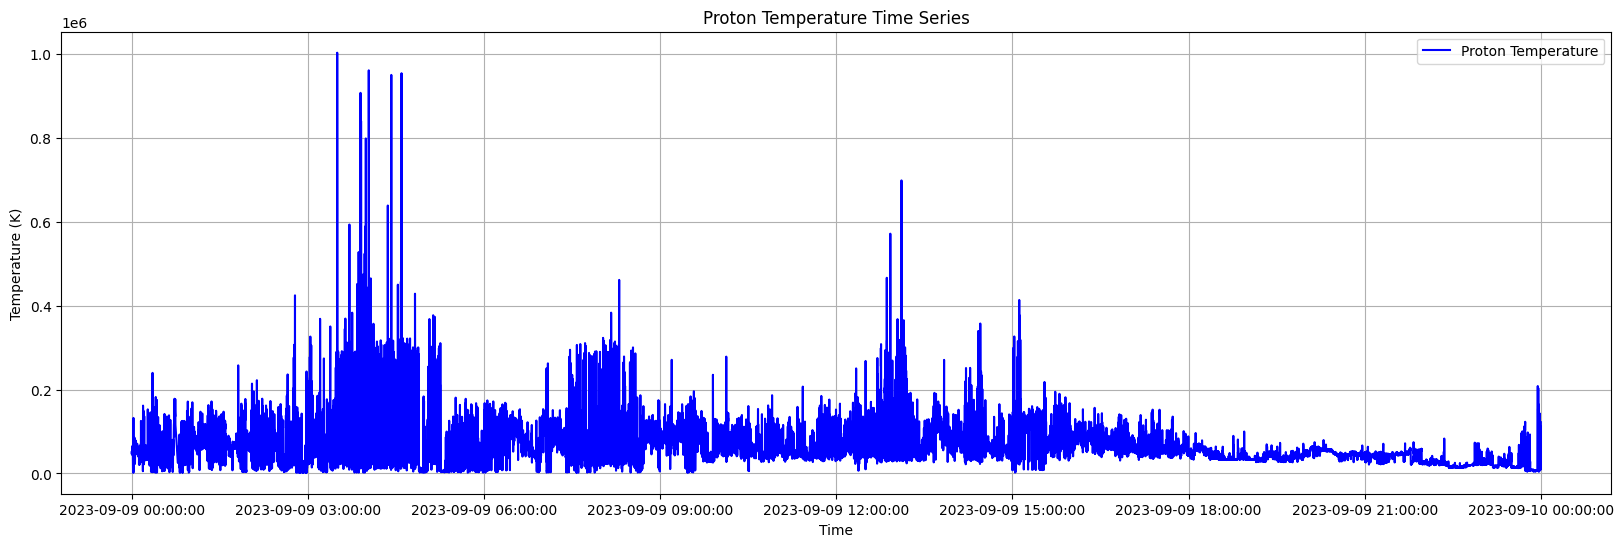

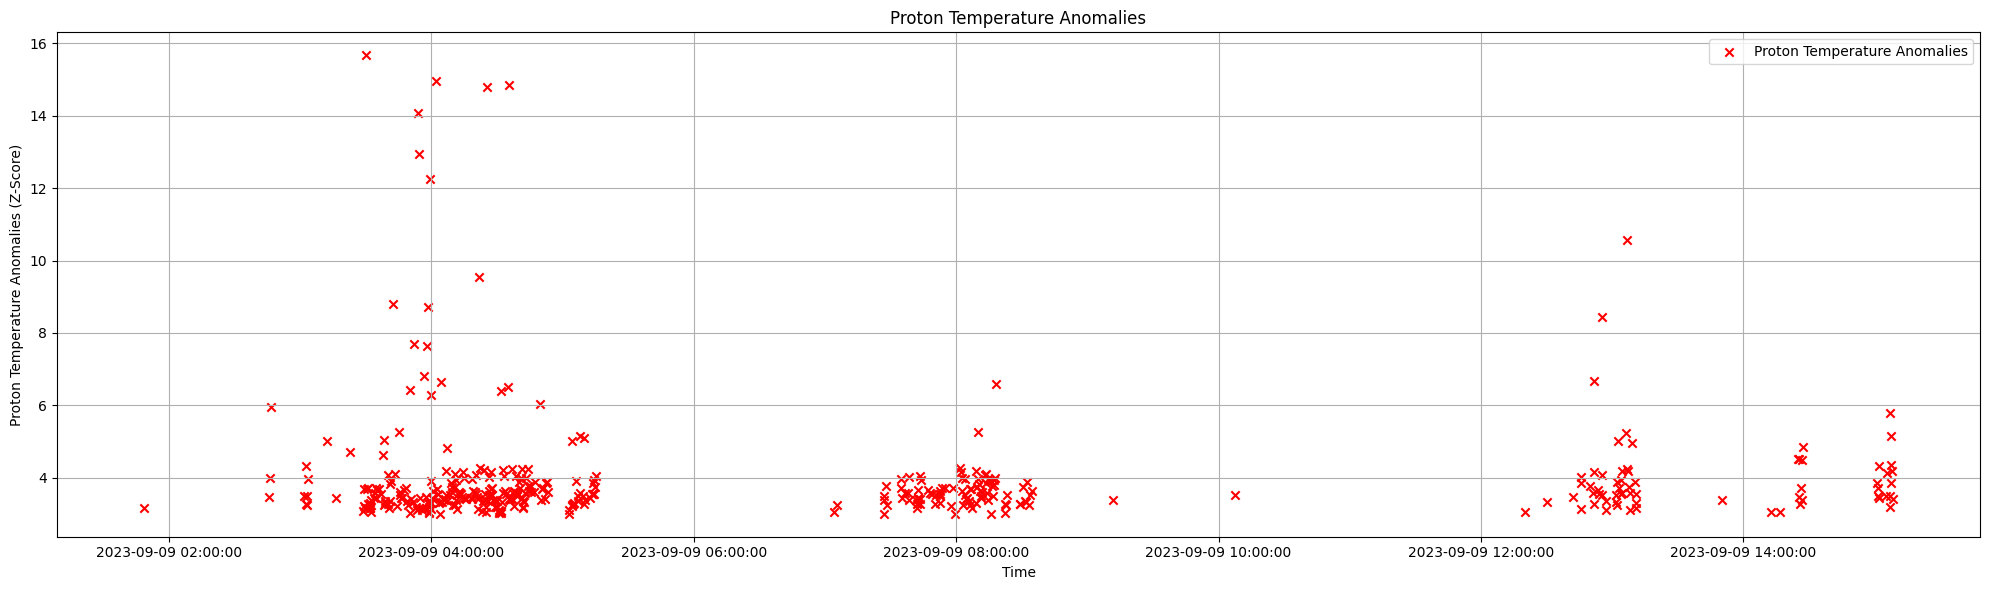

Detected Anomalies:
<xarray.DataArray 'proton_temperature_z_score' (time: 397)>
array([ 3.1592302,  3.473736 ,  3.9865913,  5.96193  ,  3.4958625,
        4.311237 ,  3.2811277,  3.4842117,  3.2406185,  3.9626014,
        5.0222406,  3.436215 ,  4.7165318,  3.0708082,  3.6962771,
        3.2143116,  3.1697564, 15.6744375,  3.6750405,  3.1709988,
        3.707055 ,  3.2717433,  3.252202 ,  3.30542  ,  3.1480327,
        3.1517093,  3.0513678,  3.3964107,  3.4413688,  3.574682 ,
        3.4329245,  3.726932 ,  3.6561372,  3.6863892,  3.5466125,
        4.6192627,  5.031961 ,  3.2447817,  3.307938 ,  3.3424878,
        4.0696917,  3.285224 ,  3.1487546,  3.828583 ,  3.3499079,
        3.9174922,  8.797215 ,  4.0986676,  3.2167962,  5.268352 ,
        3.5125163,  3.6024828,  3.4338646,  3.425202 ,  3.669215 ,
        3.7113528,  3.3565226,  3.2580612,  3.032179 ,  6.4171524,
        3.3989792,  3.3285873,  7.6935077,  3.1903048,  3.1148093,
       14.068048 ,  3.1581056, 12.937597 ,  3.447

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

z_threshold = 3

z_scores = np.abs(stats.zscore(fc1_data['proton_temperature'].values))

anomalies_da = fc1_data['proton_temperature'].copy()
anomalies_da.name = 'proton_temperature_z_score'
anomalies_da.values = z_scores

anomalies = anomalies_da.where(anomalies_da > z_threshold, drop=True)

plt.figure(figsize=(20, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.plot(fc1_data['time'], fc1_data['proton_temperature'], label='Proton Temperature', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.title('Proton Temperature Time Series')
plt.legend()
plt.grid(True)

plt.figure(figsize=(20, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.scatter(anomalies['time'], anomalies, label='Proton Temperature Anomalies', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Proton Temperature Anomalies (Z-Score)')
plt.title('Proton Temperature Anomalies')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Detected Anomalies:")
print(anomalies)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import IsolationForest

def plot_attribute_with_anomalies(data, attribute_name, contamination=0.05):

    attribute_values = data[attribute_name].values.reshape(-1, 1)

    model = IsolationForest(contamination=contamination, random_state=0)
    model.fit(attribute_values)

    anomaly_labels = model.predict(attribute_values)

    anomalies_mask = anomaly_labels == -1

    df = data.to_dataframe()

    anomalies_df = df[anomalies_mask]

    anomalies = anomalies_df.to_xarray()

    clean_data_df = df[~anomalies_mask]

    clean_data = clean_data_df.to_xarray()

    plt.figure(figsize=(20, 6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.plot(data['time'], data[attribute_name], label=f'{attribute_name}', color='blue')
    plt.xlabel('Time')
    plt.ylabel(f'{attribute_name}')
    plt.title(f'{attribute_name} Time Series')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(20, 6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.scatter(anomalies['time'], anomalies[attribute_name], label=f'{attribute_name} Anomalies', color='red', marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{attribute_name} Anomalies')
    plt.title(f'{attribute_name} Anomalies Detected by Isolation Forest')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print(f"Detected {attribute_name} Anomalies:")
    print(anomalies)

    return clean_data


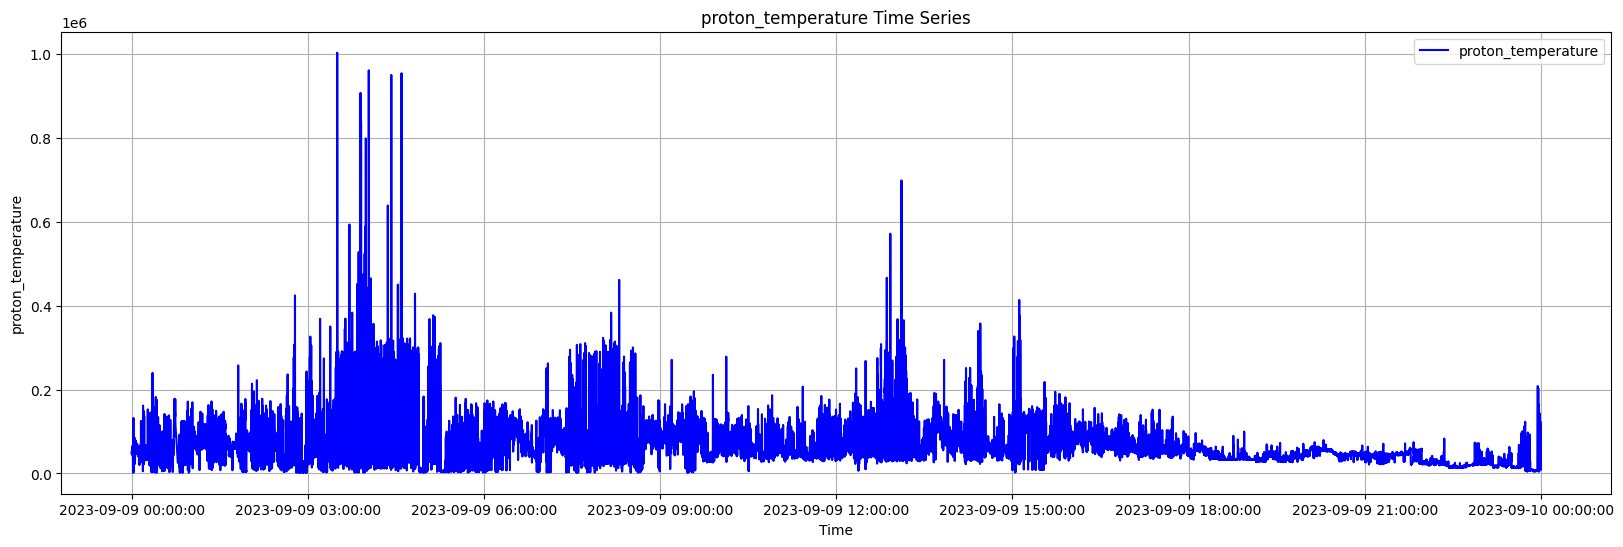

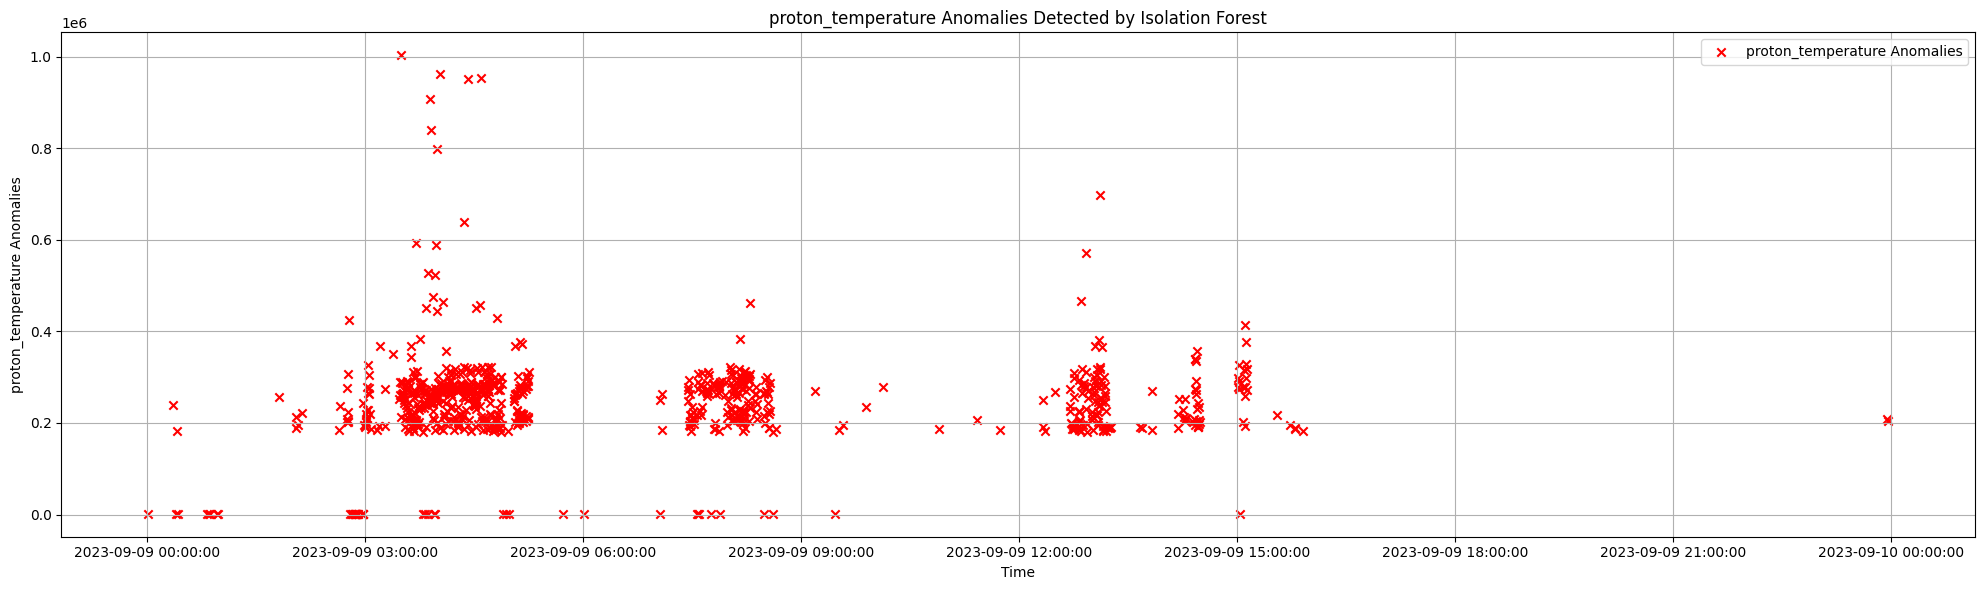

Detected proton_temperature Anomalies:
<xarray.Dataset>
Dimensions:                              (time: 760)
Coordinates:
  * time                                 (time) datetime64[ns] 2023-09-09T00:...
Data variables: (12/65)
    proton_vx_gse                        (time) float32 -418.5 -427.6 ... -368.5
    proton_vy_gse                        (time) float32 -13.9 -14.3 ... -49.0
    proton_vz_gse                        (time) float32 -2.2 -2.3 ... 30.2 60.9
    proton_vx_gsm                        (time) float32 -418.5 -427.6 ... -368.5
    proton_vy_gsm                        (time) float32 -14.1 -14.4 ... -32.8
    proton_vz_gsm                        (time) float32 1.3 1.3 ... 33.4 71.0
    ...                                   ...
    bad_alpha_vx_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vy_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vz_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_

In [ ]:
clean_proton_temperature = plot_attribute_with_anomalies(fc1_data, 'proton_temperature', contamination=0.05)

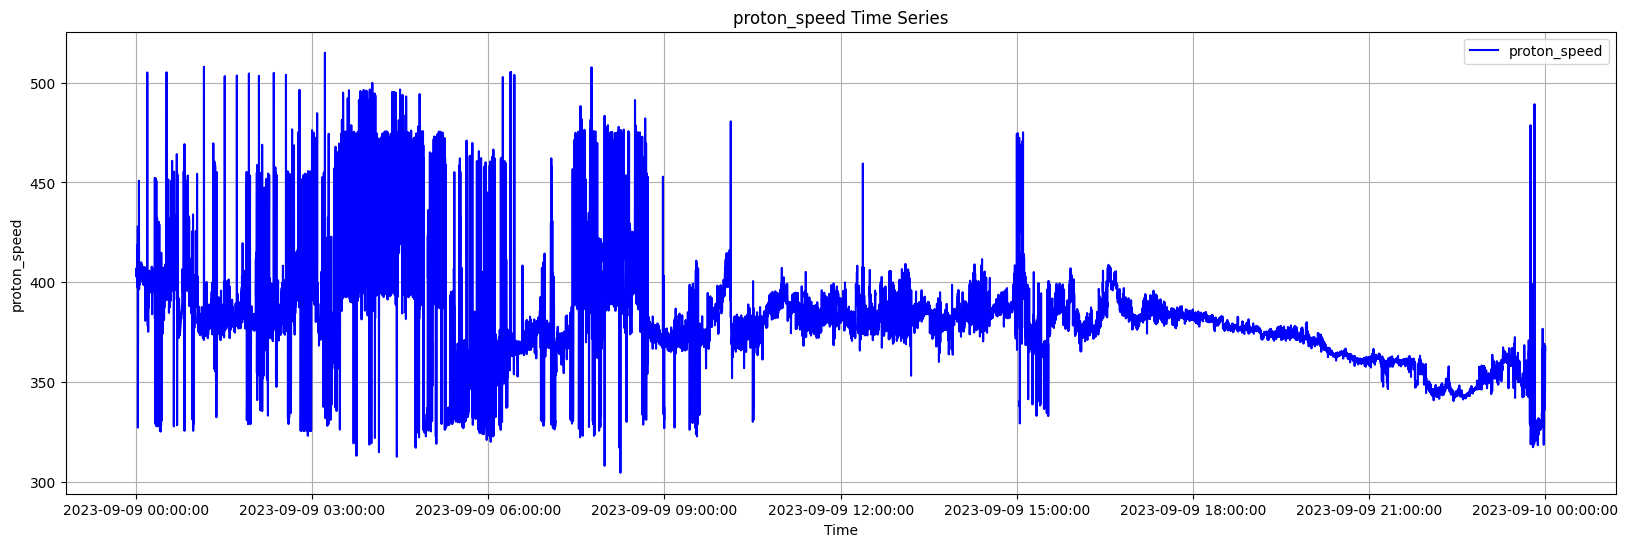

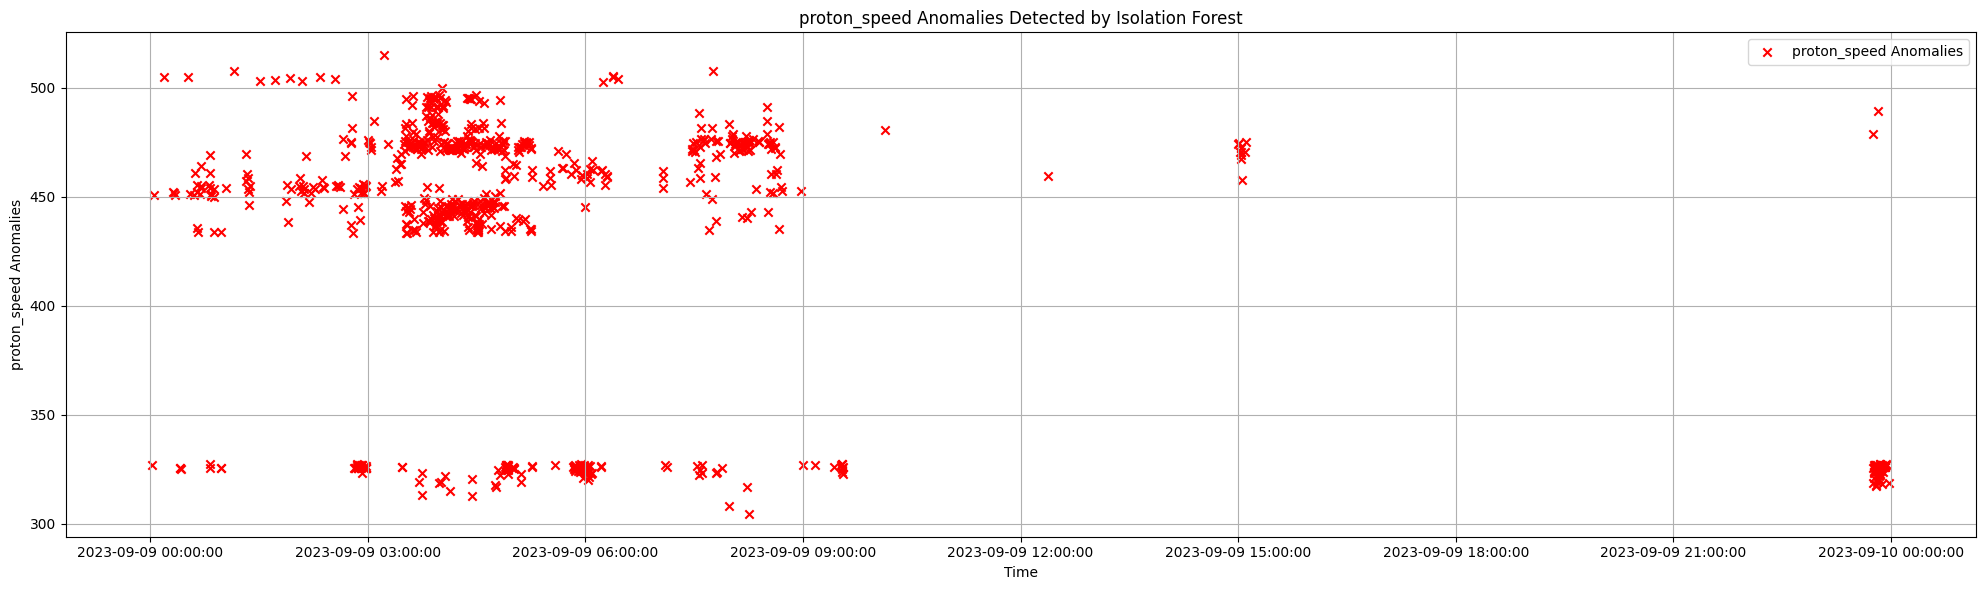

Detected proton_speed Anomalies:
<xarray.Dataset>
Dimensions:                              (time: 758)
Coordinates:
  * time                                 (time) datetime64[ns] 2023-09-09T00:...
Data variables: (12/65)
    proton_vx_gse                        (time) float32 -327.0 -450.6 ... -318.4
    proton_vy_gse                        (time) float32 -10.9 -15.1 ... -11.1
    proton_vz_gse                        (time) float32 -1.7 -2.5 ... 22.3 -2.0
    proton_vx_gsm                        (time) float32 -327.0 -450.6 ... -318.4
    proton_vy_gsm                        (time) float32 -11.0 -15.2 ... -11.3
    proton_vz_gsm                        (time) float32 1.0 1.3 1.5 ... 35.2 0.7
    ...                                   ...
    bad_alpha_vx_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vy_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vz_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alp

In [ ]:
clean_proton_speed = plot_attribute_with_anomalies(fc1_data, 'proton_speed', contamination=0.05)

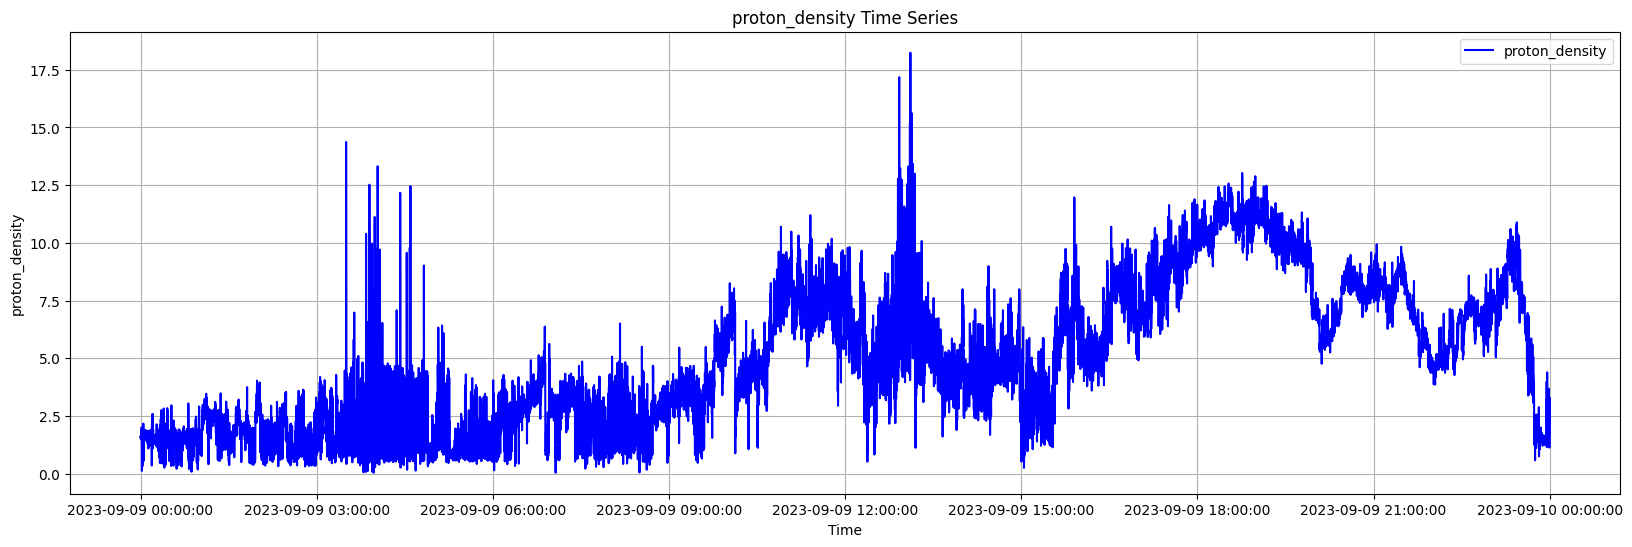

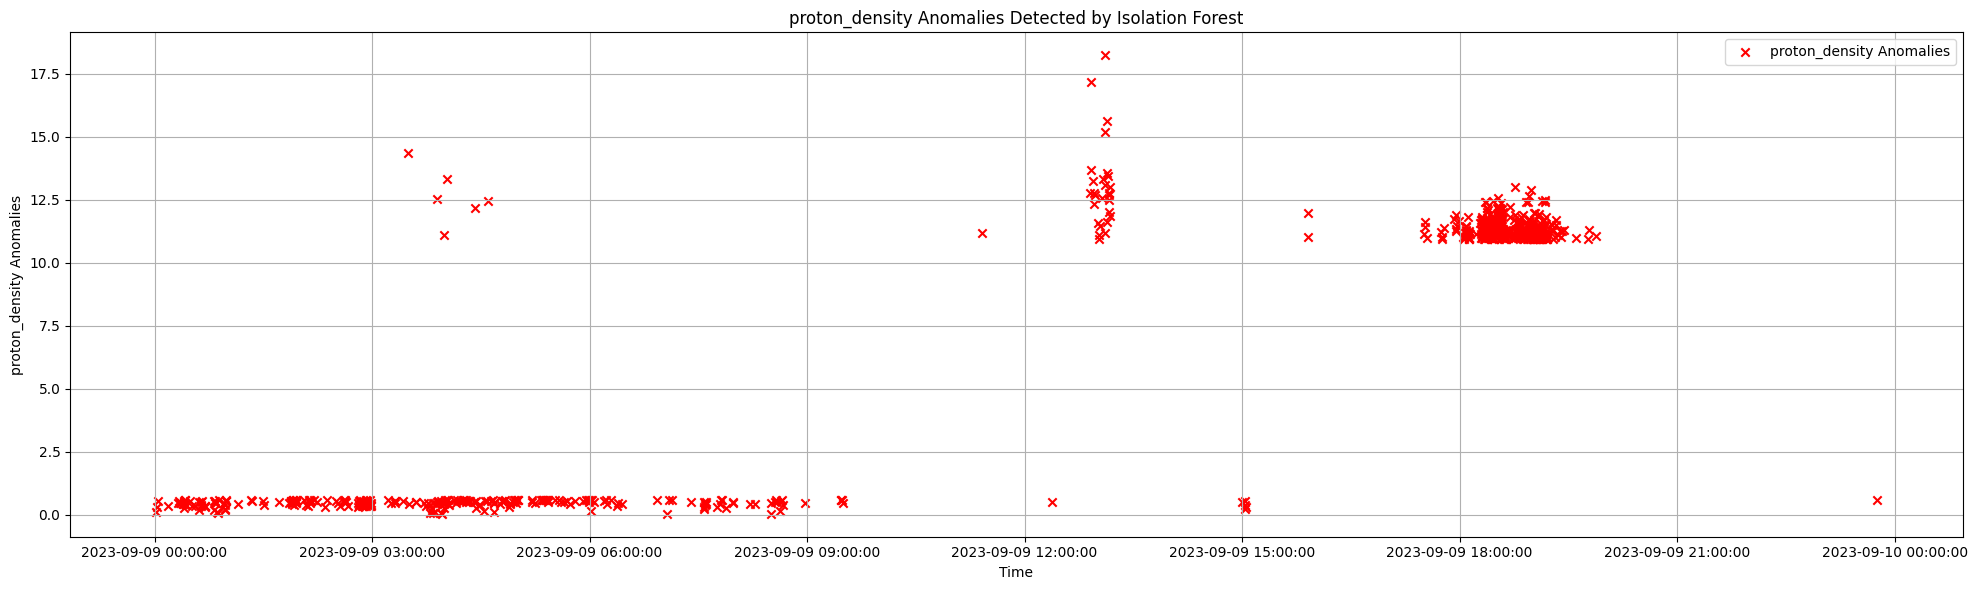

Detected proton_density Anomalies:
<xarray.Dataset>
Dimensions:                              (time: 743)
Coordinates:
  * time                                 (time) datetime64[ns] 2023-09-09T00:...
Data variables: (12/65)
    proton_vx_gse                        (time) float32 -418.5 -327.0 ... -478.4
    proton_vy_gse                        (time) float32 -13.9 -10.9 ... -16.7
    proton_vz_gse                        (time) float32 -2.2 -1.7 ... 11.2 -3.0
    proton_vx_gsm                        (time) float32 -418.5 -327.0 ... -478.4
    proton_vy_gsm                        (time) float32 -14.1 -11.0 ... -16.9
    proton_vz_gsm                        (time) float32 1.3 1.0 1.1 ... -1.0 1.1
    ...                                   ...
    bad_alpha_vx_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vy_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_alpha_vz_gse_flag                (time) int8 0 0 0 0 0 0 ... 0 0 0 0 0 0
    bad_a

In [ ]:
clean_proton_density = plot_attribute_with_anomalies(fc1_data, 'proton_density', contamination=0.05)